# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [2]:
%pylab inline 

#%matplotlib notebook   # in python 3 this puts every plot in the same (first) figure

import numpy as np
from scipy.linalg import hadamard
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

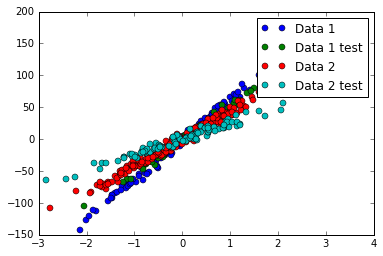

In [4]:
from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1

# { VARYING SAMPLE SIZE }

# DATA SET 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)

# DATA SET 2
(x2,y2) = make_regression(n_samples=200, n_features=n_dimensions, noise=noise)
(x2_test,y2_test) = make_regression(n_samples=100, n_features=n_dimensions, noise=noise)


plt.plot(x1,y1,'o', label='Data 1')
plt.plot(x1_test,y1_test, 'o', label='Data 1 test')
plt.plot(x2,y2,'o', label='Data 2')
plt.plot(x2_test,y2_test, 'o', label='Data 2 test')
legend()
plt.show()

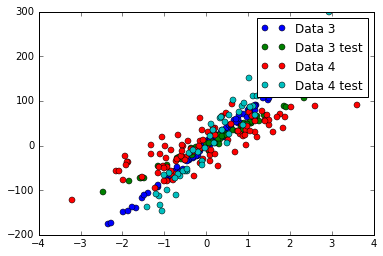

In [5]:
# { VARYING NOISE LEVEL }

# DATA SET 3
(x3,y3) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x3_test,y3_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)

# DATA SET 4
(x4,y4) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=30)
(x4_test,y4_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=30)

plt.plot(x3,y3,'o', label= 'Data 3')
plt.plot(x3_test,y3_test, 'o',label= 'Data 3 test')
plt.plot(x4,y4,'o',label= 'Data 4')
plt.plot(x4_test,y4_test, 'o', label= 'Data 4 test')
legend()
plt.show()

# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

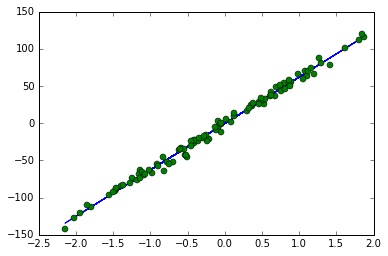

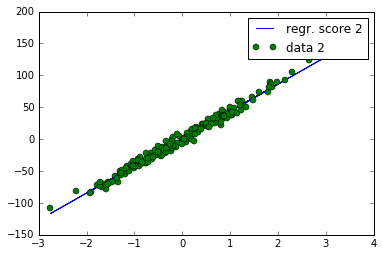

In [6]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

# { VARYING SAMPLE SIZE }

# DATA SET 1 

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has 
print 'regression score data set 1 = %s' % regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1), label= 'regr. score 1')
plt.plot(x1,y1,'o', label='data 1')
plt.show()

# DATA SET 2 

#Fit the regression object on the data
regr.fit(x2,y2)

#Print the score that the fit has
print 'regression score data set 2 = %s' % regr.score(x2_test,y2_test)

#Plot the resulting line
plt.plot(x2,regr.predict(x2), label= 'regr. score 2')
plt.plot(x2,y2,'o', label='data 2')
legend()
plt.show()

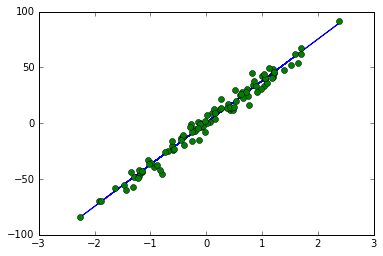

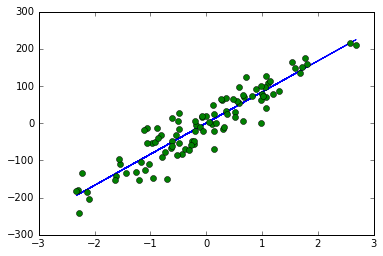

/home/rein/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


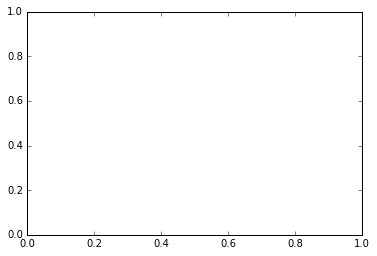

In [18]:
# { VARYING NOISE LEVEL }

# DATA SET 3 

#Fit the regression object on the data
regr.fit(x3,y3)

#Print the score that the fit has 
print 'regression score data set 3 = %s' % regr.score(x3_test,y3_test)

#Plot the resulting line
plt.plot(x3,regr.predict(x3), label= 'regr. score 3')
plt.plot(x3,y3,'o', label='data 3')
plt.show()

# DATA SET 4 

#Fit the regression object on the data
regr.fit(x4,y4)

#Print the score that the fit has
print 'regression score data set 4 = %s' % regr.score(x4_test,y4_test)

#Plot the resulting line
plt.plot(x4,regr.predict(x4), label= 'regr. score 4')
plt.plot(x4,y4,'o', label='data 4')
plt.show()

legend()

## Analysis

### Varying sample size
##### Data set 1
Samples : 100 

Noise   : 5

Regression score : 0.428681167039
##### Data set 2
Samples: 200 

Noise : 5

Regression score : -0.34283412193

### Varying noise level 
###### Data set 3
Samples :100

Noise   :5

Regression score : -63.3559378472
###### Data set 4
Samples :100

Noise   :30

Regression score : -1.13606920113

### Conclusion


From the first regression plot (data set 1 & data set 2) we observe that the points for both lines the average distance from the best-fit line is roughly equal. The only factor that seperates data set 1 from data set 2 is the sample size, this is illustrated by the plot as there are a lot more points for data set 2. Thus varying the sample size increases the number of plots, but given a constant noise level, the distance of the points from the best-fit line remain roughly equal for data set 1 and 2. 

The second regression plot demonstrates the variability of noise level with a constant sample size. Given the constant sample size we observe an equal amount of points for both data set 3 and data set 4, nevertheless the distance from the best-fit line is different. Data set 4 has a larger noise level, this is translated to the plot in a larger average distance of the points to the best fit line. The points of data set 3, with a smaller noise level, thus lay closer to the best-fit line. 

regression score data set 1 = -0.447785824041


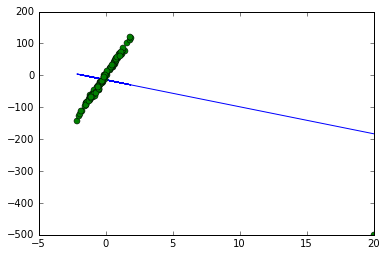

C:\Users\Floortje\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


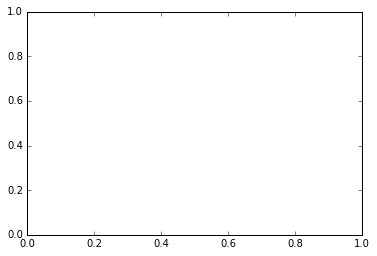

In [83]:
#Add a serious outlier and see what happens

#Example of creating big outlier:
x1[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y1[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.
regr.fit(x1,y1)

#Print the score that the fit has 
print 'regression score data set 1 = %s' % regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1), label= 'regr. score 1')
plt.plot(x1,y1,'o', label='data 1')
plt.show()

legend()

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [7]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    return theta0 + theta1*x

In [8]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):
    m = y.size
    k = sum((x_predict - y)**2)  
    return (0.5*k)/m


In [9]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y,x):
    m = y.size
    theta0 = sum(x_predict - y)/m
    theta1 = sum((x_predict - y)*x)/m
    return (theta0,theta1)


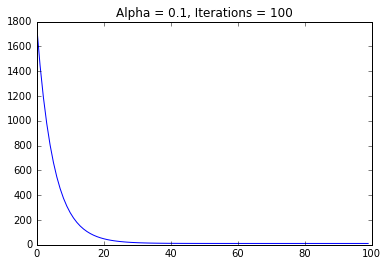

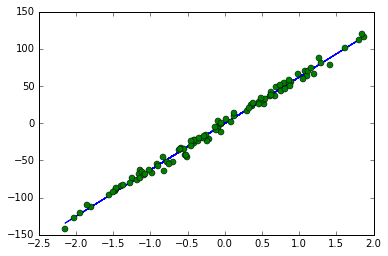

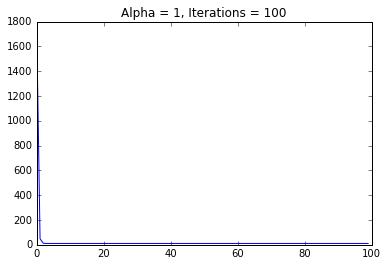

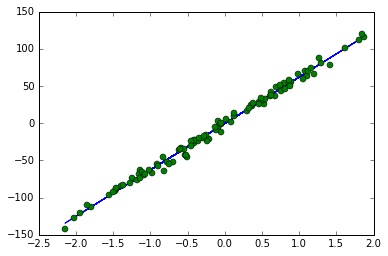

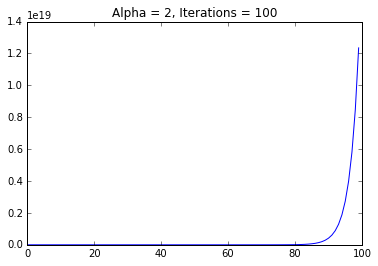

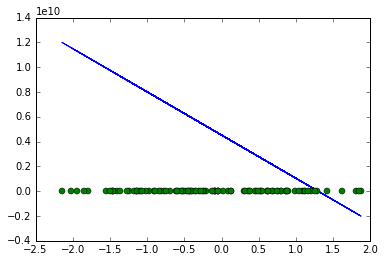

In [79]:
def c_function(alpha,iterations):
    stopcondition = 0
    i=0
    cost = 10
    costvector = []   # vector to save the costs of every iteration to
    theta0 = 0
    theta1 = 1
    x = squeeze(x1)   #transform x1 into a simple vector size (100,)
    y = y1
    while (i < iterations) and (cost > stopcondition):
        i = i +1              # Incrementing the iteration counter                            
        x_predict = prediction_function(x,theta0,theta1) # Calculate predicted value for x given current hypothesis
        costvector = np.append(costvector, cost_function(x_predict,y)) #calculate cost for this iteration    
        dtheta0, dtheta1 = compute_gradient(x_predict,y,x)      
        theta0 = theta0 - alpha * dtheta0  #calculate new values for theta0,1 stimultaneously using the compute gradient function
        theta1 = theta1 - alpha * dtheta1
    v = np.arange(0,iterations)                # Vector with number of iterations that is used to plot the cost           
    costvector = np.hstack(costvector)
    return(v,costvector,theta0,theta1)

# VARYING ALPHA

x = squeeze(x1)   #transform x1 into a simple vector size (100,)
y = y1

plt.plot(c_function(0.1,100)[0],c_function(0.1,100)[1])
plt.title('Alpha = 0.1, Iterations = 100')
plt.show()
figure()

plt.plot(x,prediction_function(x,c_function(0.1,100)[2],c_function(0.1,100)[3]))
plt.plot(x,y,'o')
plt.show()

plt.plot(c_function(1,100)[0],c_function(1,100)[1]) 
plt.title('Alpha = 1, Iterations = 100')
plt.show()
figure()

plt.plot(x,prediction_function(x,c_function(1,100)[2],c_function(1,100)[3]))
plt.plot(x,y,'o')
plt.show()

plt.plot(c_function(2,100)[0],c_function(2,100)[1]) 
plt.title('Alpha = 2, Iterations = 100')
plt.show()
figure()

plt.plot(x,prediction_function(x,c_function(2,100)[2],c_function(2,100)[3]))
plt.plot(x,y,'o')
plt.show()

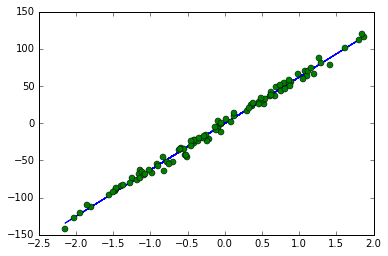

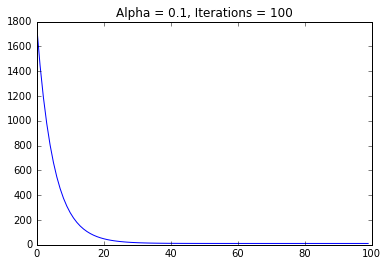

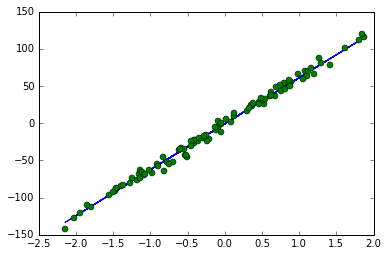

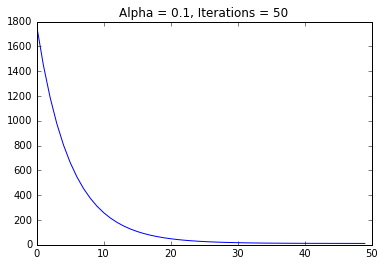

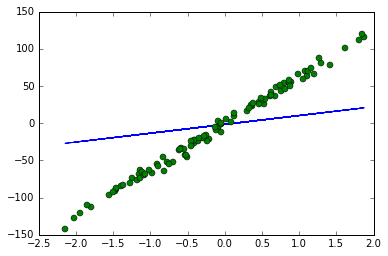

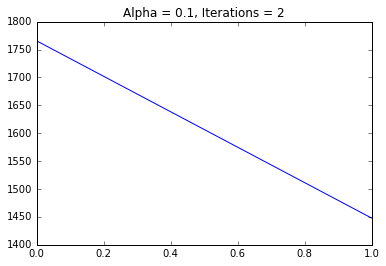

In [82]:
# VARYING ITERATIONS

x = squeeze(x1)   #transform x1 into a simple vector size (100,)
y = y1

plt.plot(x,prediction_function(x,c_function(0.1,100)[2],c_function(0.1,100)[3]))
plt.plot(x,y,'o')
plt.show()

plt.plot(c_function(0.1,100)[0],c_function(0.1,100)[1]) 
plt.title('Alpha = 0.1, Iterations = 100')
plt.show()
figure()

plt.plot(x,prediction_function(x,c_function(0.1,50)[2],c_function(0.1,50)[3]))
plt.plot(x,y,'o')
plt.show()

plt.plot(c_function(0.1,50)[0],c_function(0.1,50)[1]) 
plt.title('Alpha = 0.1, Iterations = 50')     
plt.show()
figure()

plt.plot(x,prediction_function(x,c_function(0.1,2)[2],c_function(0.1,2)[3]))
plt.plot(x,y,'o')
plt.show()

plt.plot(c_function(0.1,2)[0],c_function(0.1,2)[1]) 
plt.title('Alpha = 0.1, Iterations = 2')     
plt.show()
figure()

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

As our objective with a best-fit line is to minimize the cost function, our expectation is that with the number of iterations, the cost decreases. The plot matches our expectation as we see a negative sloping line. Additionally, since the values for theta become smaller and smaller, we expect the negative exponential curve for cost like the plot is displaying. 

As for the learning rate, alpha, we see that the bigger steps we take the fewer iterations are neccesary to minimize the cost. This is demonstrated by the plot as the slope is a lot steeper for a higher alpha value. Yet we should be careful not to take a too high value, for example in the plot with alpha level 2, we see that the plot misses the cost entirely as it jumped over the minimum value for the cost. 

The effect of iterations is illustrated in the second set of graphs. We see that having too few iterations (last plots) results in a best-fit line not representative of the data set. This is expected since the cost function hasn't hit its minimal yet. However with larger iterations, we see that the last iterations are redundant once the cost value has hit its lowest point.



# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

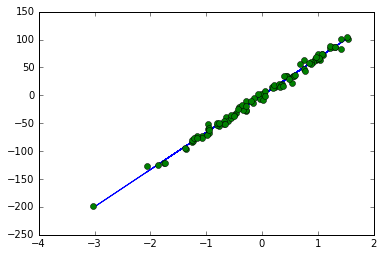

In [55]:
def least_squares(x,y):
    theta1 = np.dot(np.linalg.pinv(np.dot(x.T,x)),(np.dot(x.T,y)))
    return(theta1)

plt.plot(x1,prediction_function(x1,0,(least_squares(x1,y1))))
plt.plot(x1,y1,'o')